In [ ]:
import csv
import sklearn
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Check for number of null values

In [ ]:
train.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Remove columns that are not factors to survival. In this case, PassengerId,
Ticket.

In [ ]:
train = train.drop(["PassengerId", "Ticket"], axis=1)

Remove null values in Age, Embarked

In [ ]:
train = train.dropna(subset=["Age"])
train = train.dropna(subset=["Embarked"])

Modify cabin into a new row deck by:
1. Replacing all null values with U0
2. Extract alphabet from cabin into deck
3. Drop cabin

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    # Convert null values into U0
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    # Extract alphabet from cabin
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    # Map alphabets of Deck into numeric digits
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

train = train.drop(["Cabin"], axis = 1)

SibSp (# of siblings / spouses aboard the Titanic), Parch (# of parents / children aboard the Titanic) both indicate number of relatives. Hence, they can be combined  into a new variable, Relatives for both test and train sets.

In [ ]:
data = [train, test]

for dataset in data:
  dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']

# Drop both after creation of Relatives
train = train.drop(["SibSp", "Parch"], axis = 1)

Tokenise Sex, Embarked into int





In [ ]:
sex = {"male": 0, "female": 1}
embark = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
  dataset["Sex"] = dataset["Sex"].map(sex)
  dataset["Embarked"] = dataset["Embarked"].map(embark)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   712 non-null    int64  
 1   Pclass     712 non-null    int64  
 2   Name       712 non-null    object 
 3   Sex        712 non-null    int64  
 4   Age        712 non-null    float64
 5   Fare       712 non-null    float64
 6   Embarked   712 non-null    int64  
 7   Deck       712 non-null    int64  
 8   Relatives  712 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 55.6+ KB


Start EDA: Bi-variate analysis with Survived as the target variable.

In [ ]:
pclass = pd.DataFrame(train["Pclass"])
sex = pd.DataFrame(train["Sex"])
age = pd.DataFrame(train["Age"])
fare = pd.DataFrame(train["Fare"])
embarked = pd.DataFrame(train["Embarked"])
deck = pd.DataFrame(train["Deck"])
relatives = pd.DataFrame(train["Relatives"])

**Visualise numerical variables**

In [ ]:
# Describe for numerical variables
numeric_train = train[["Age", "Fare", "Relatives", "Survived"]]
numeric_train.describe().round(2)

,Age,Fare,Relatives,Survived
count,712.00,712.00,712.00,712.00
mean,29.64,34.57,0.95,0.40
std,14.49,52.94,1.49,0.49
min,0.42,0.00,0.00,0.00
25%,20.00,8.05,0.00,0.00
50%,28.00,15.65,0.00,0.00
75%,38.00,33.00,1.00,1.00
max,80.00,512.33,7.00,1.00


<Axes: >

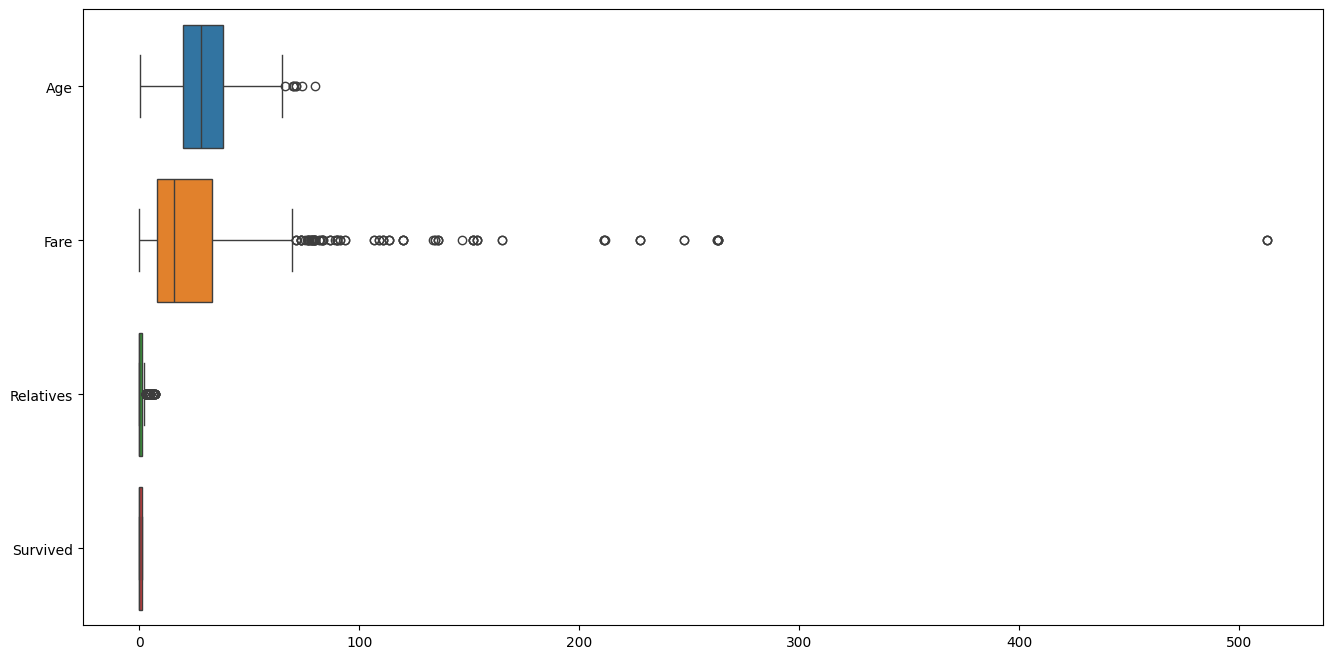

In [ ]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numeric_train, orient = "h")

<Axes: xlabel='Age', ylabel='Survived'>

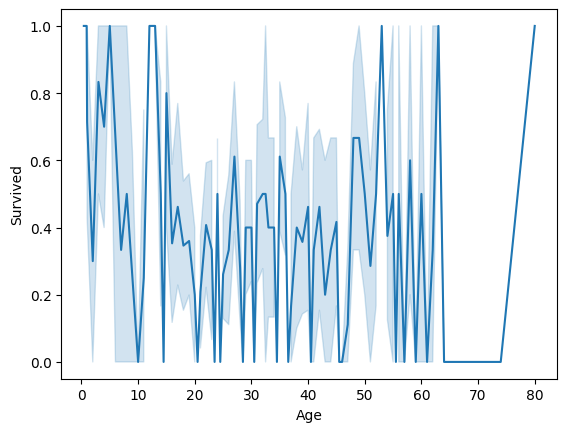

In [ ]:
# Plot the line plot
sb.lineplot(x="Age", y="Survived", data=numeric_train)

<Axes: xlabel='Fare', ylabel='Survived'>

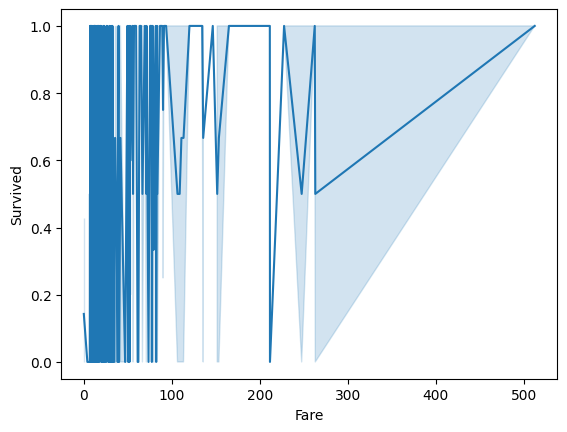

In [ ]:
sb.lineplot(x="Fare", y="Survived", data=numeric_train)

<Axes: xlabel='Relatives', ylabel='Survived'>

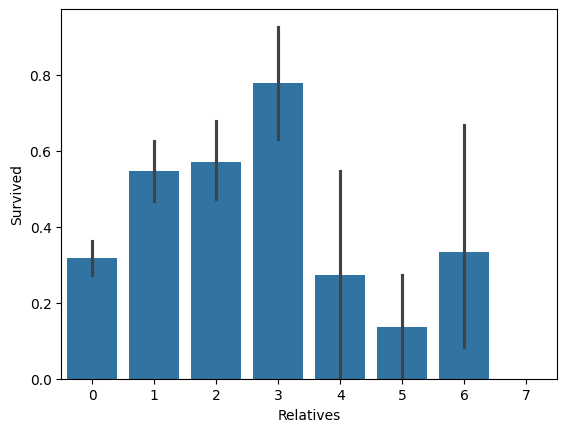

In [ ]:
sb.barplot(x="Relatives", y="Survived", data=numeric_train)

**Visualise categorical variables**

In [ ]:
cat_train = train[["Pclass", "Sex", "Embarked", "Deck", "Survived"]]

Pclass: 1 = 1st, 2 = 2nd, 3 = 3rd

<Axes: xlabel='Pclass', ylabel='Survived'>

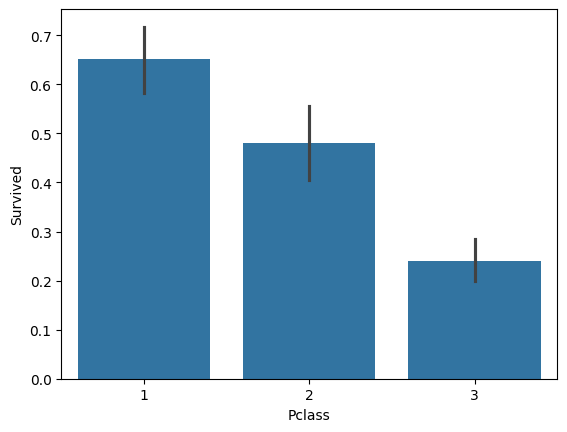

In [ ]:
sb.barplot(x="Pclass", y="Survived", data=cat_train)

Sex: 0 = Male, 1 = Female

<Axes: xlabel='Sex', ylabel='Survived'>

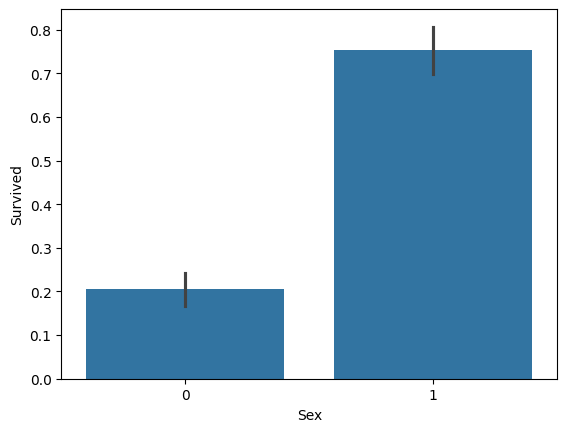

In [ ]:
sb.barplot(x="Sex", y="Survived", data=cat_train)

Embarked: 0 = Southampton, 1 = Cherbourg, 2 = Queenstown

<Axes: xlabel='Embarked', ylabel='Survived'>

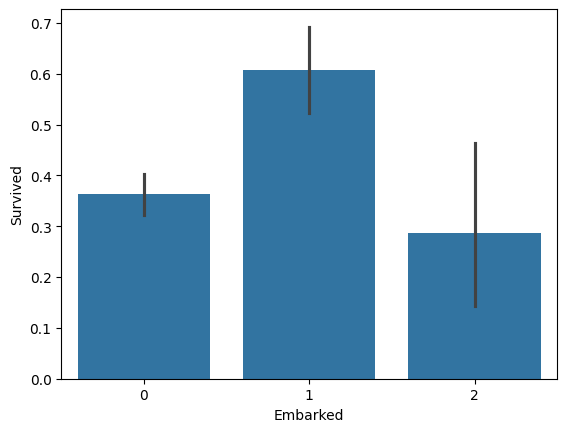

In [ ]:
sb.barplot(x="Embarked", y="Survived", data=cat_train)

<Axes: xlabel='Embarked', ylabel='Pclass'>

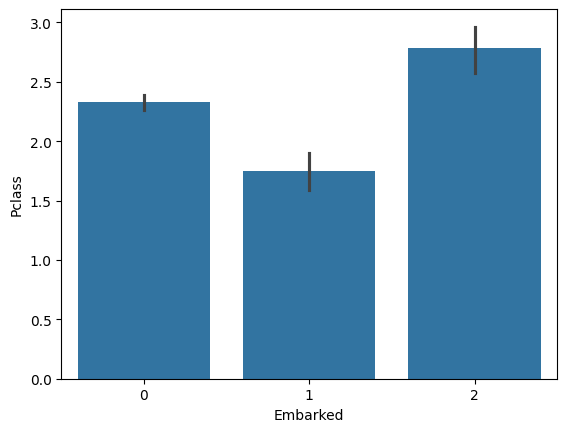

In [ ]:
sb.barplot(x="Embarked", y="Pclass", data=cat_train)

<Axes: xlabel='Deck', ylabel='Survived'>

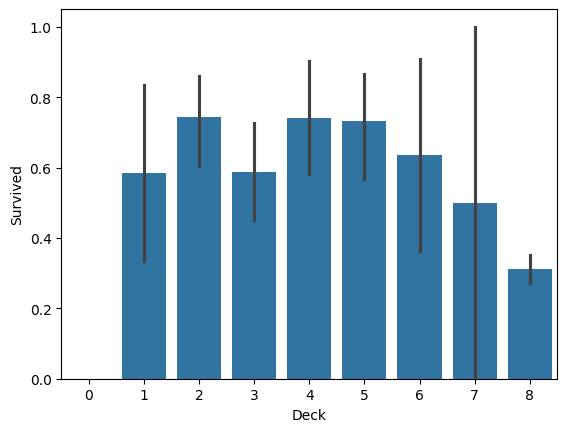

In [ ]:
sb.barplot(x="Deck", y="Survived", data=cat_train)

## BINARY CLASSIFICATION SUMMARISED AND CORRELATION

Lets also plot the survival correlation for each of the numerical features. Here we see:

1.   The highest survival rate for male were among children.
2.   Survival rate is positively correlated with social class and fare price

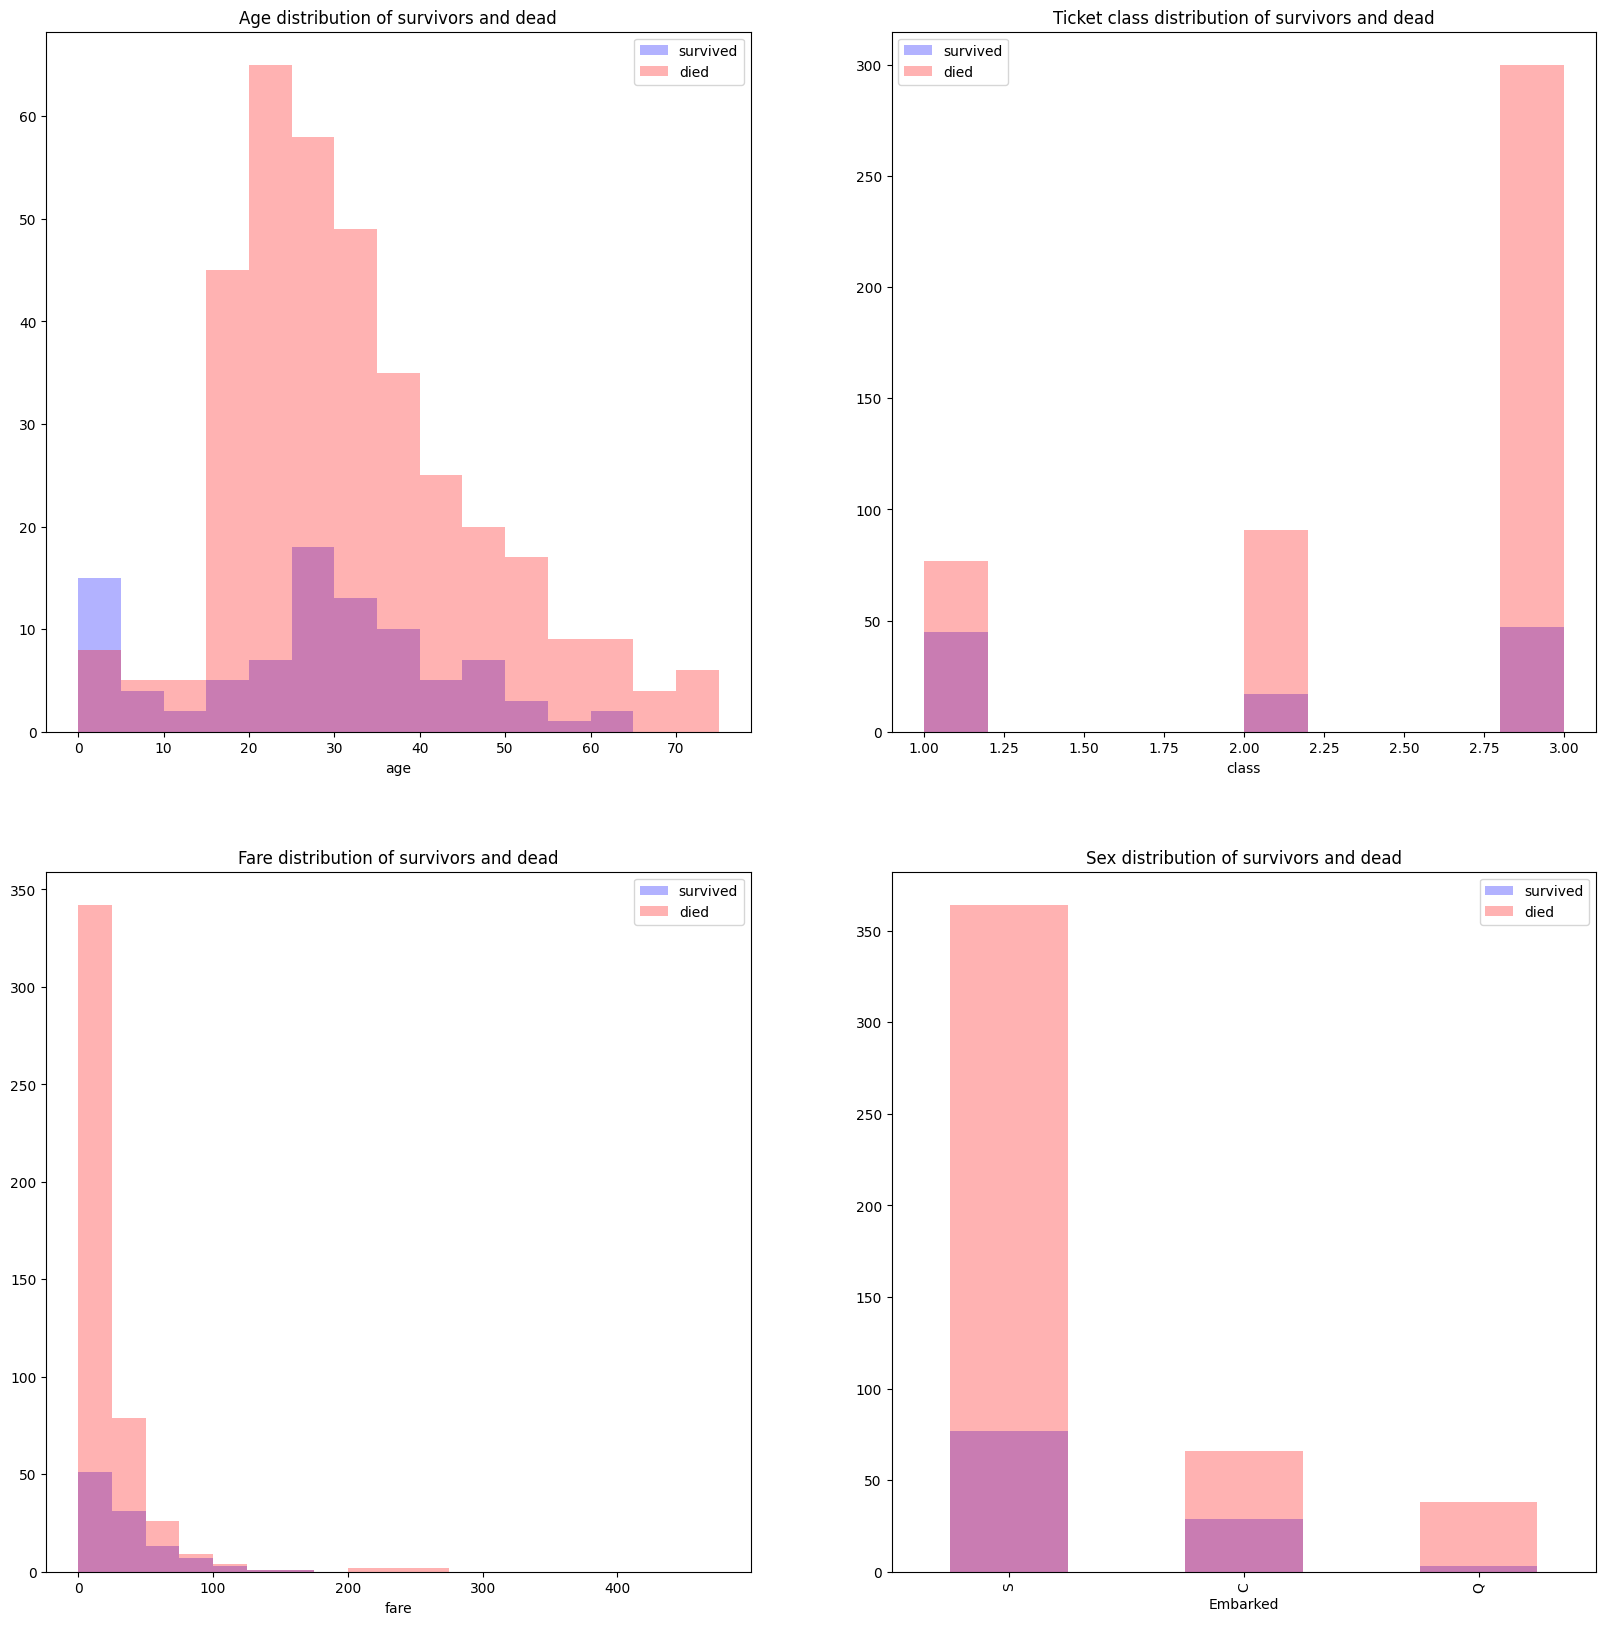

In [ ]:
_df = train[(train['Sex'] == 'male')]

# Plotting feature distributions of males
plt.figure(figsize=(10*2,10*2))

plt.subplot(221)
plt.title("Age distribution of survivors and dead")
bins = range(0,80,5)
plt.hist(_df.loc[_df['Survived'] == 1]['Age'], color='blue', alpha=.3, label='survived', bins=bins)
plt.hist(_df.loc[_df['Survived'] == 0]['Age'], color='red', alpha=.3, label='died', bins=bins)
plt.xlabel('age')
plt.legend()

plt.subplot(222)
plt.title("Ticket class distribution of survivors and dead")
plt.hist(_df.loc[_df['Survived'] == 1]['Pclass'], color='blue', alpha=.3, label='survived')
plt.hist(_df.loc[_df['Survived'] == 0]['Pclass'], color='red', alpha=.3, label='died')
plt.legend()
plt.xlabel('class')

plt.subplot(223)
plt.title("Fare distribution of survivors and dead")
bins = range(0,500,25)
plt.hist(_df.loc[_df['Survived'] == 1]['Fare'], color='blue', alpha=.3, label='survived', bins=bins)
plt.hist(_df.loc[_df['Survived'] == 0]['Fare'], color='red', alpha=.3, label='died', bins=bins)
plt.legend()
plt.xlabel('fare')

plt.subplot(224)
plt.title("Sex distribution of survivors and dead")
_df.loc[_df['Survived'] == 1]['Embarked'].value_counts().plot(kind='bar', color='blue', alpha=.3, label='survived')
_df.loc[_df['Survived'] == 0]['Embarked'].value_counts().plot(kind='bar', color='red', alpha=.3, label='died')
plt.legend()
plt.show()

Finally lets plot the feature correlation matrix. This will be useful when interpreting model results. We see significant correlations between social class and fare price as well as number of siblings and number of parents on the boat.

To have a look at the influence of gender and age on passenger survival the data set is split into male and female passengers and the analysis for age groups from above is repeated.

In [ ]:
train['AgeGroup'] = 0

# labels for the different age groups
age_groups = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'] # age groups

# split the passengers into age groups of 10 years
train['AgeGroup'] = pd.cut(train['Age'], range(0, 90, 10), labels=age_groups)

def age_group_summary(df, age_groups):
    """Create a result summary for the different age groups."""
    # calculate the survival rates and counts for the different age groups
    age_survival = df[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])

    # reindex to get the correct order in the calculated data frame
    age_survival = age_survival.reindex(age_groups)

    # change the column headers
    age_survival.columns = age_survival.columns.droplevel() # remove multilevel index
    age_survival.columns = ['Survival rate', 'Total', 'Survived']

    # create a new column containing the number of passengers that died
    age_survival['Died'] = age_survival['Total'] - age_survival['Survived']

    return age_survival

# calculate the survival rates for the different age groups
age_survival = age_group_summary(train, age_groups)
age_survival

,Survival rate,Total,Survived,Died
AgeGroup,,,,
1-10,0.593750,64,38,26
11-20,0.382609,115,44,71
21-30,0.365217,230,84,146
31-40,0.441558,154,68,86
41-50,0.383721,86,33,53
51-60,0.404762,42,17,25
61-70,0.187500,16,3,13
71-80,0.200000,5,1,4


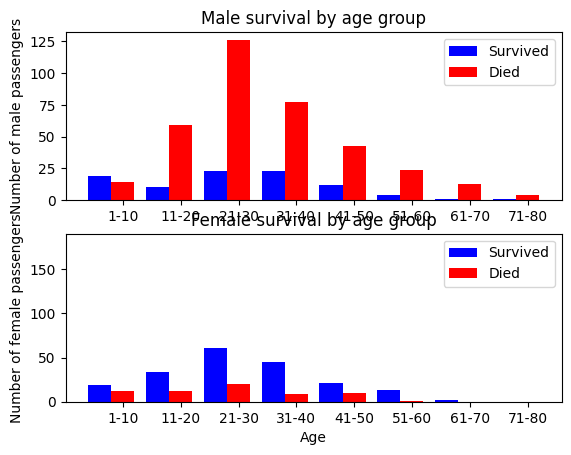

In [ ]:
men_df = train.loc[train['Sex'] == 0]
women_df = train.loc[train['Sex'] == 1]

# calculate the survival rates for the different age groups for both genders
male_age_survival = age_group_summary(men_df, age_groups)
female_age_survival = age_group_summary(women_df, age_groups)

# vectors for the bar positions
ind = np.arange(len(male_age_survival))

# bar width
width = 0.4

# create 2 subplots in the figure
fig, (ax1, ax2) = plt.subplots(2, 1)

# male bar plot
survived = male_age_survival['Survived'].values
bar11 = ax1.bar(ind, survived, width=width, color='blue', label='Survived')

died = male_age_survival['Died'].values
bar12 = ax1.bar(ind + width, died, width=width, color='red',
              label='Died')

# format male bar plot
ax1.set(xticks=(ind + width), xticklabels=age_groups, ylabel='Number of male passengers',
       title='Male survival by age group')
ax1.legend()

# female bar plot
survived = female_age_survival['Survived'].values
bar21 = ax2.bar(ind, survived, width=width, color='blue', label='Survived')

died = female_age_survival['Died'].values
bar22 = ax2.bar(ind + width, died, width=width, color='red',
              label='Died')

# format female bar plot
ax2.set(xlabel='Age', xticks=(ind + width), xticklabels=age_groups, ylabel='Number of female passengers', ylim=[0, 180],
       title='Female survival by age group')
ax2.legend()

plt.show()

In [ ]:
sb.heatmap(train.corr(numeric_only=True), annot=True, annot_kws={"fontsize": 8})
plt.show()

Combining them into one crrelation heatmap comparing them with survivability we obtain the following


In [ ]:
train_df = train.select_dtypes(include=['number'])
corr_matrix = train_df.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix[['Survived']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Survived', fontsize=16)
plt.show()

PClass and Sex of the passenger have the highest correlation with survivability


# Model for Prediction

Using scikitlearn, we can easily implement machine learning models on our dataset. As this is a classification and regression problem, we selected models that will fit our criteria.

In [ ]:
X_train = train.drop(["Name", "Survived"], axis=1)
y_train = train["Survived"]
X_test = test.drop(["Name","PassengerId", "Cabin", "Parch", "SibSp", "Ticket"], axis=1).copy()
X_test.dropna(inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


79.07

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


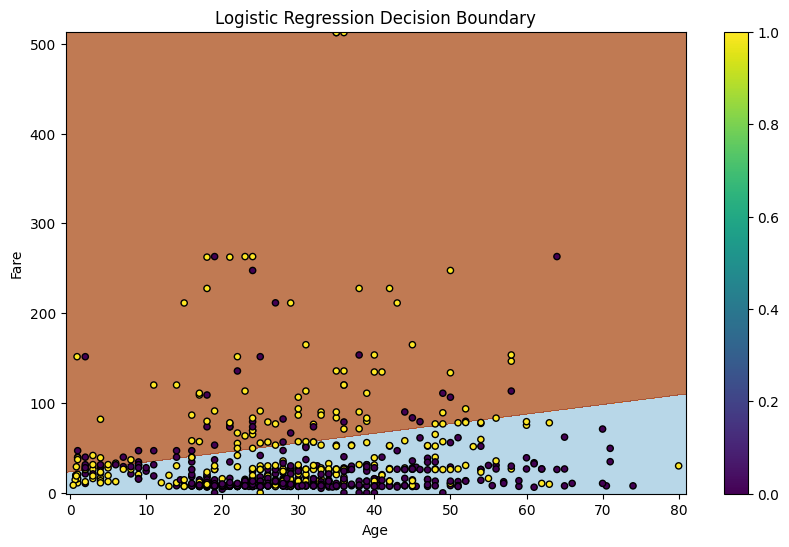

In [ ]:
X_vis = X_train[['Age', 'Fare']]

# Fit the logistic regression model
logreg.fit(X_vis, y_train)

# Plot the decision boundary
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolors='k', s=20)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

82.44

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.23

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


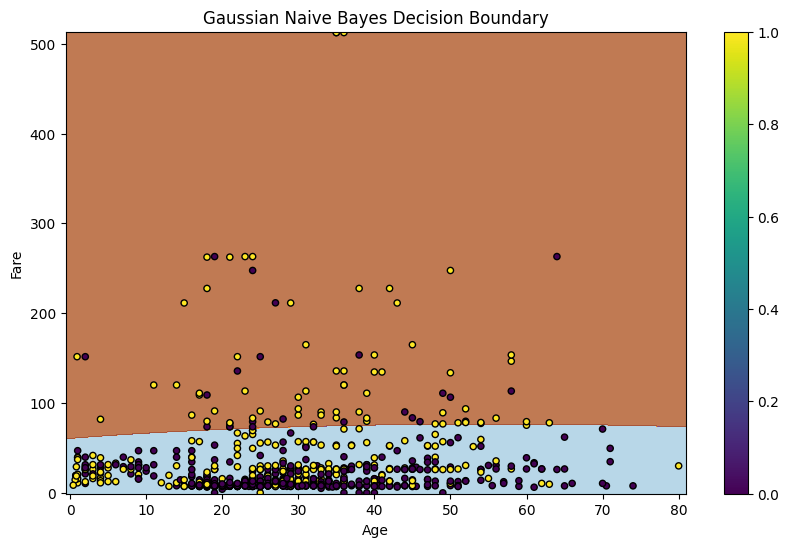

In [ ]:
gaussian.fit(X_vis, y_train)

Z = gaussian.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plot the training data
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolors='k', s=20)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Gaussian Naive Bayes Decision Boundary')
plt.colorbar()
plt.show()

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

43.26

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


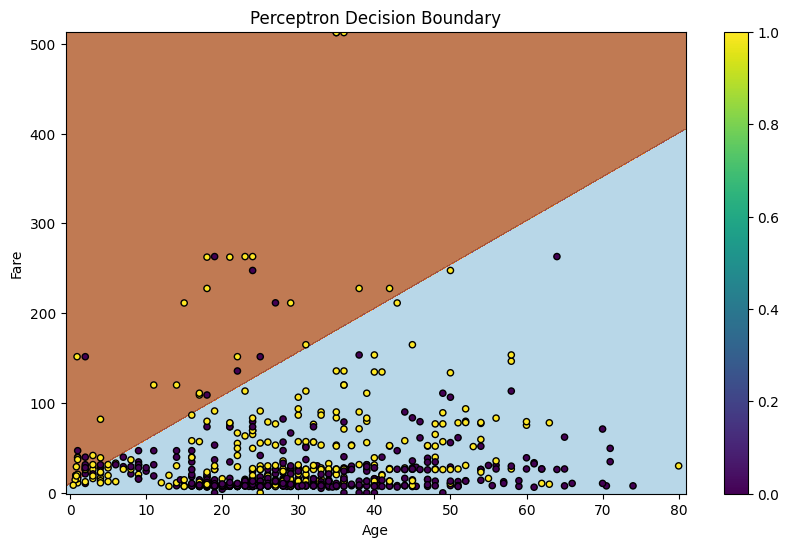

In [ ]:
perceptron.fit(X_vis, y_train)

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plot the training data
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolors='k', s=20)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Perceptron Decision Boundary')
plt.colorbar()
plt.show()

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


72.89

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


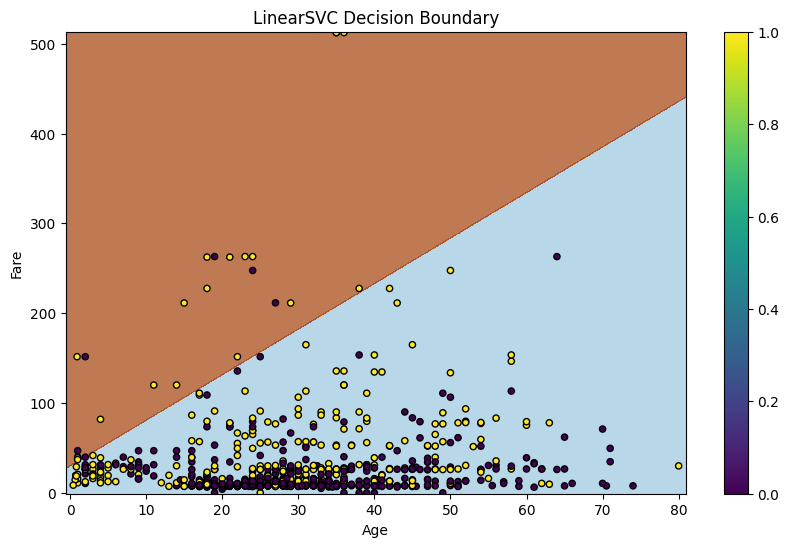

In [ ]:
linear_svc.fit(X_vis, y_train)

Z = linear_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plot the training data
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolors='k', s=20)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('LinearSVC Decision Boundary')
plt.colorbar()
plt.show()

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

77.81

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


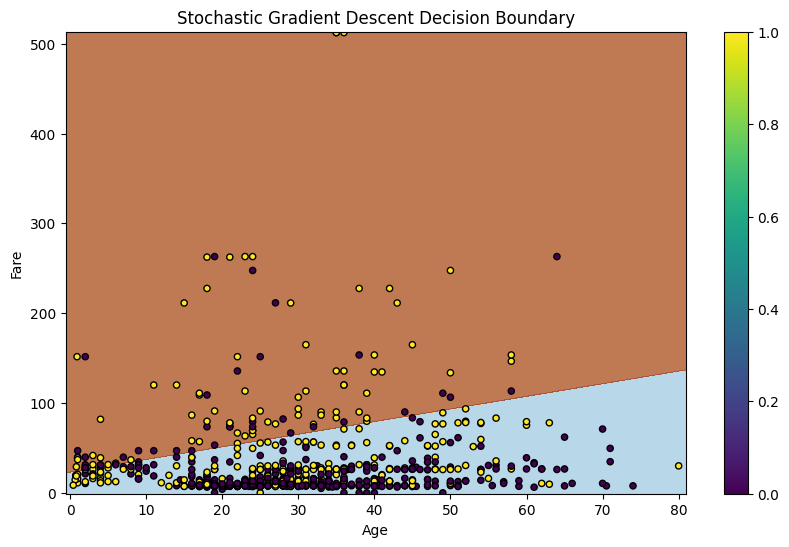

In [ ]:
sgd.fit(X_vis, y_train)

Z = sgd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plot the training data
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_train, edgecolors='k', s=20)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Stochastic Gradient Descent Decision Boundary')
plt.colorbar()
plt.show()

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

99.02

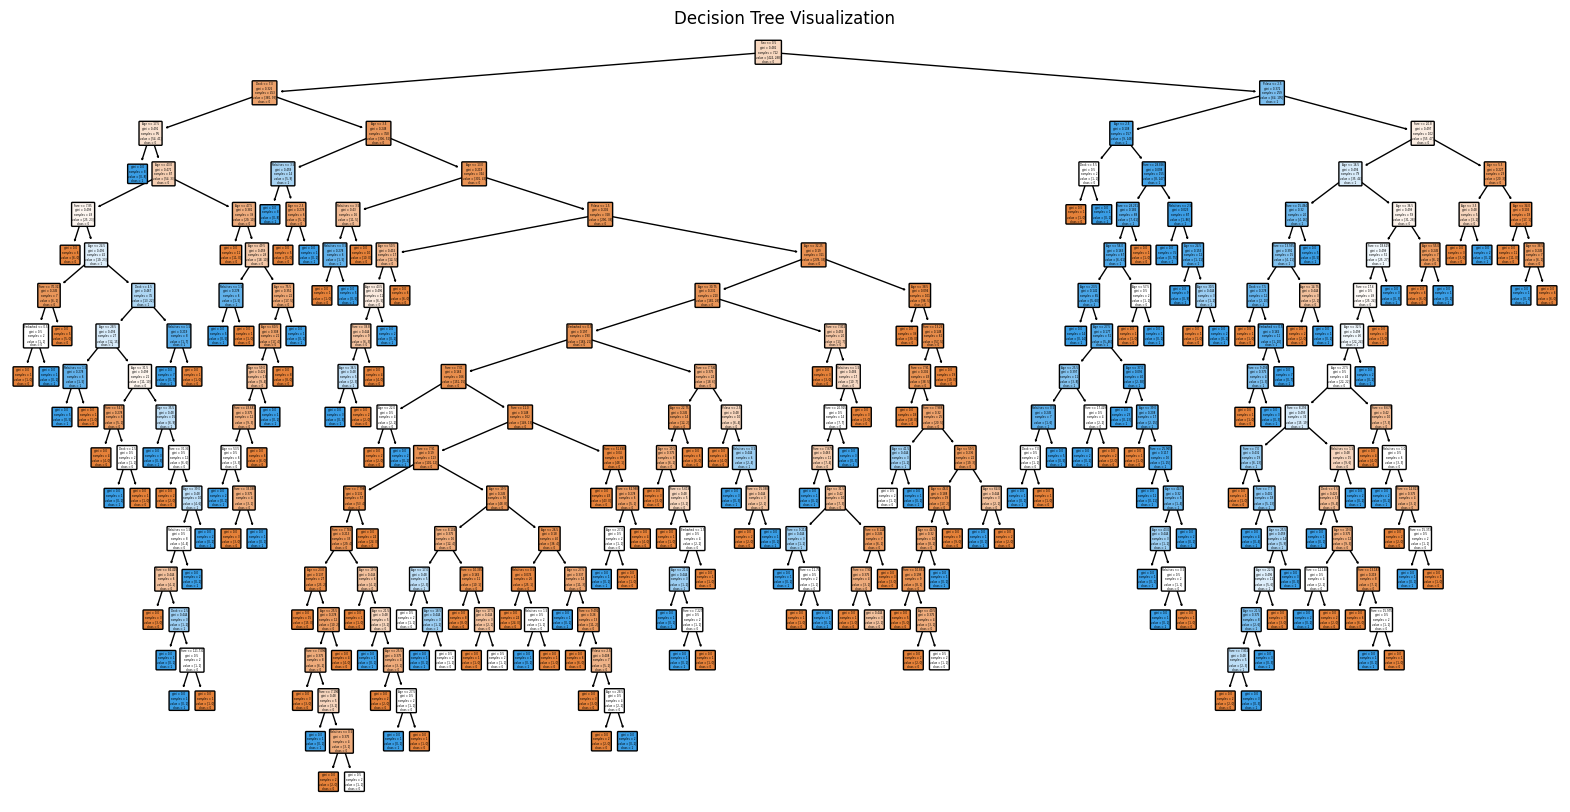

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

99.02

Print a single tree in random forest

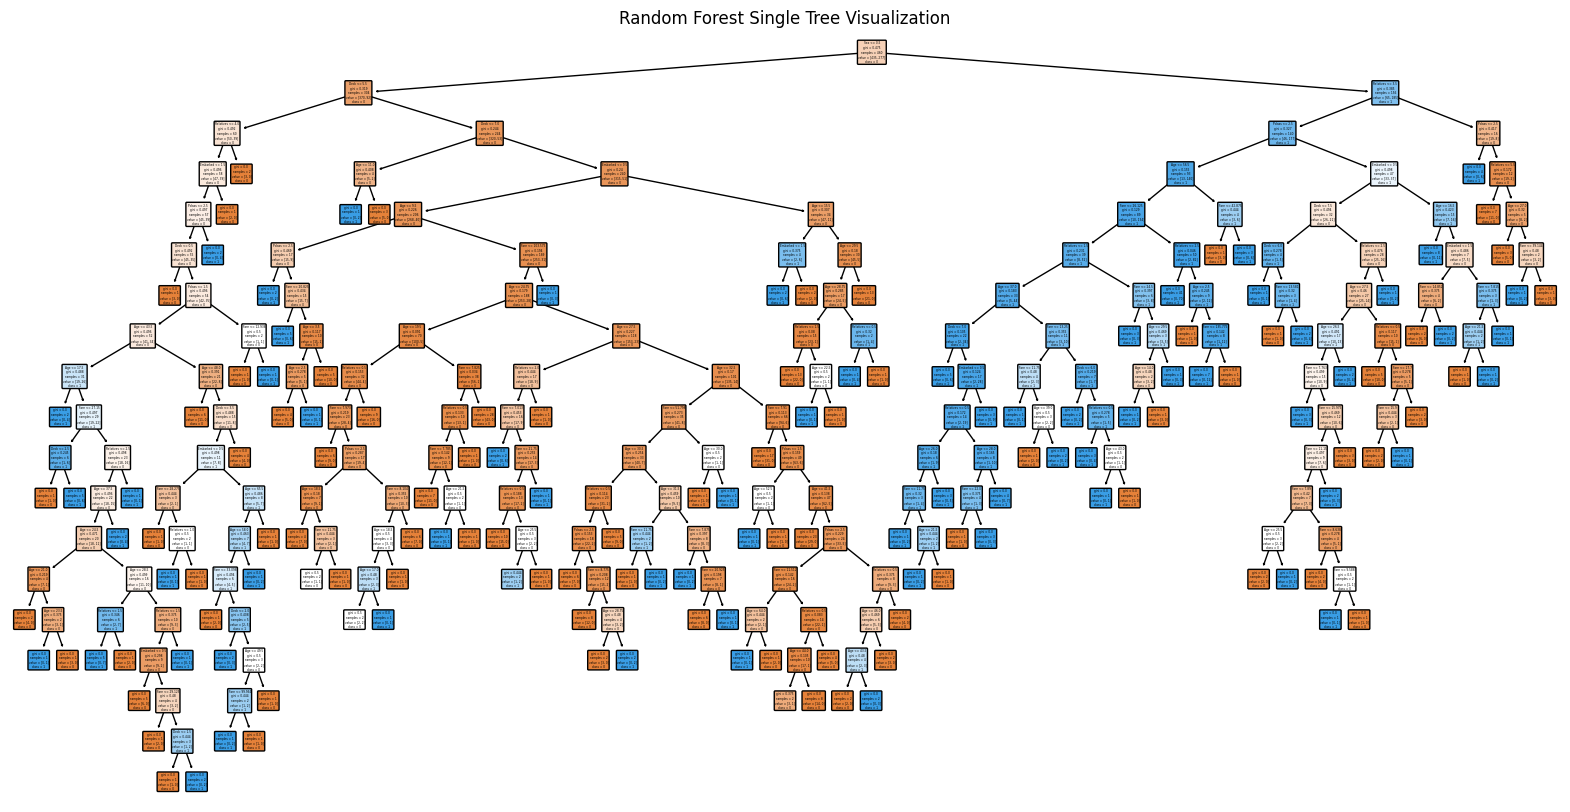

In [ ]:
single_tree = random_forest.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Random Forest Single Tree Visualization")
plt.show()

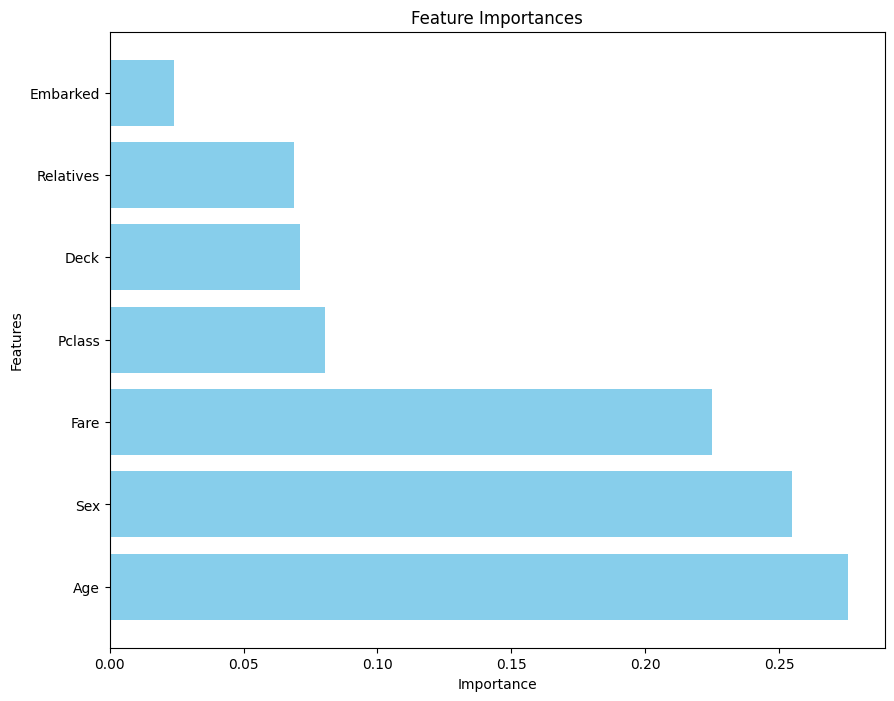

     Feature  Importance
2        Age    0.275709
1        Sex    0.254926
3       Fare    0.224967
0     Pclass    0.080555
5       Deck    0.071098
6  Relatives    0.068884
4   Embarked    0.023860


In [ ]:
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature importances
feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

Comparison between different models, the Random Forest model was performing the best.

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,99.02
7,Decision Tree,99.02
0,KNN,82.44
1,Logistic Regression,79.07
3,Naive Bayes,78.23
5,Stochastic Gradient Decent,77.81
6,Linear SVC,72.89
4,Perceptron,43.26


Predicting the survivability in the test dataset.

In [ ]:
X_test["Predicted Survivability"] = y_pred
X_test

,Pclass,Sex,Age,Fare,Embarked,Deck,Relatives,Predicted Survivability
0,3,0,34.5,7.8292,2,8,0,0
1,3,1,47.0,7.0000,0,8,1,0
2,2,0,62.0,9.6875,2,8,0,0
3,3,0,27.0,8.6625,0,8,0,1
4,3,1,22.0,12.2875,0,8,2,1
...,...,...,...,...,...,...,...,...
409,3,1,3.0,13.7750,0,8,2,1
411,1,1,37.0,90.0000,2,3,1,1
412,3,1,28.0,7.7750,0,8,0,0
414,1,1,39.0,108.9000,1,3,0,1


If one of our team mates, Jun Han was on the ship, he would not have
survived. However, being a female would've allowed him to survive.

In [ ]:
me = {
    'Pclass': [3, 3],
    'Sex': [0, 1],
    'Age': [21, 21],
    'Fare': [7.25, 7.25],
    'Embarked': [0, 0],
    'Deck': [8, 8],
    'Relatives': [0, 0]
}
df_me = pd.DataFrame(me)
me_pred = random_forest.predict(df_me)
print(me_pred)

[0 1]
